In [81]:
import numpy
from keras.datasets import mnist

In [82]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [83]:
from keras import models
from keras import layers

network = models.Sequential()

# añade capas
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [84]:
# necesita la funcion optimizador, la funcion de perdida, y las metricas a monitorear
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
train_images_r = train_images.reshape((60000, 28 * 28))
train_images_r = train_images_r.astype('float32') / 255
test_images_r = test_images.reshape((10000, 28 * 28))
test_images_r = test_images_r.astype('float32') / 255

In [86]:
train_labels.shape

(60000,)

In [87]:
from keras.utils import to_categorical

train_labels_r = to_categorical(train_labels)
test_labels_r = to_categorical(test_labels)

In [89]:
network.fit(train_images_r, train_labels_r, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0294 - accuracy: 0.9911
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0222 - accuracy: 0.9935
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0160 - accuracy: 0.9959
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0126 - accuracy: 0.9966
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0098 - accuracy: 0.9976


In [93]:
test_loss, test_acc = network.evaluate(test_images_r, test_labels_r)
print('test_acc:', test_acc)
print('test_loss:', test_loss)
#The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training
#set accuracy. This gap between training accuracy and test accuracy is an example of
#overfitting

313/313 [==============================] - 1s 3ms/step - loss: 0.0601 - accuracy: 0.9820
test_acc: 0.9819999933242798
test_loss: 0.06008820980787277


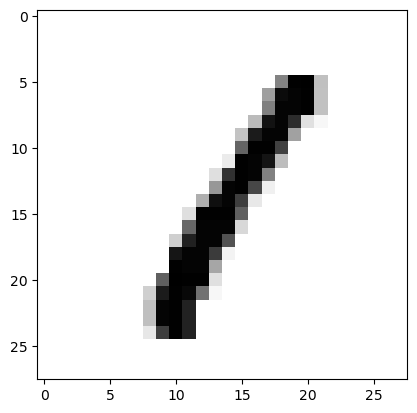

In [112]:
digit = train_images[3]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [113]:
network.save("net")

INFO:tensorflow:Assets written to: net\assets


INFO:tensorflow:Assets written to: net\assets
